In [4]:
import json
import os
import pandas as pd
import numpy as np
import json
import watson_developer_cloud.natural_language_understanding.features.v1 as Features
import pdfminer
import textract
import re
import glob


from flask import jsonify
from scipy.spatial.distance import cdist
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import hierarchical, KMeans, MeanShift
from sklearn.model_selection import train_test_split
from watson_developer_cloud import NaturalLanguageUnderstandingV1

import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\austi\Anaconda3\envs\watson\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO
import sys

def pdf_parser(data, count):

    fp = file(data, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data = retstr.getvalue()

    file_name = "Output" + str(count) + ".txt"
    data = data.decode('utf-8').encode('ascii', 'ignore')
    data = data.lower()
    text_file = file(file_name, "w")
    text_file.write(data)
    text_file.close()
    # print data
    return data

# Loops to create txt files for pdfs that are lowered and encoded ascii
def pdf_loop(directory, count):
    for filename in os.listdir(directory):
        if filename.endswith(".pdf"):
            path = directory + "\\" +filename
            pdf_parser(path, count)
            print(count)
            count += 1
            
            continue
        else:
            continue
    
    

In [6]:
def cleanhtml(raw_html):
  cleanr = re.compile('\.*?')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [12]:
# Reads text files. Loops directory and appends text to list
articles = []
def article_list(directory):
    articles = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            path = directory + "\\" + filename
            text = open(path, 'r').read()
            articles.append(text)
            continue
        else:
            continue
    return articles

articles = article_list(r"C:\Users\austi\Google Drive\PycharmProjects\Debate-Bot\Watson-nlp\articles-text")
#for article in range(1, 80):
 #   file_path = 'articles/test' + str(article) + ".pdf"
#    t = pdfparser(file_path, article)
 #   #t = t.decode('utf-8').encode('ascii', 'ignore')
    #t = t.lower()
# articles.append(t)


In [16]:
print(articles[5])


leveraging the world cup: mega 
sporting events, human rights 
risk, and worker welfare reform 
in qatar

sarath k. ganji 
us fulbright scholar

executive summary
qatar  will  realize  its  decades-long  drive  to  host  a  mega  sporting  event 
when,  in  2022,  the  opening  ceremony  of  the  fdration  internationale 
de football association (fifa) world cup commences. by that time, the 
qatari government will have invested at least $200 billion in real estate 
and  development  projects,  employing  anywhere  between  500,000  and 
1.5  million  foreign  workers  to  do  so.  the  scale  of  these  preparations  is 
staggering  and not necessarily positive. between 2010 and 2013, more 
than 1,200 labor migrants working in qatars construction sector died, with 
another 4,000 deaths projected by the start of the event. foreign workers 
are subject to conditions of forced labor, human trafficking, and indefinite 
detention. advocacy groups cite deplorable living and working condition

In [17]:
def watson_text_analysis(text_):
    natural_language_understanding = NaturalLanguageUnderstandingV1(
      username="8fe00c1b-54ef-4291-a754-cbfcabecacfa",
      password="TguupnbIZO1Z",
      version="2017-02-27")
    # Limits to 2000 keywords, no emotion or sentiment
    response = natural_language_understanding.analyze(
      text=text_,
      features=[
        Features.Keywords(
          emotion=False,
          sentiment=False,
          limit=300
        )
      ]
    )
    my_dump = json.dumps(response, indent=2)
    my_load = json.loads(my_dump)
    new_dict = dict()
    for d in my_load['keywords']:
        lst = [k for k in d.keys()]
        for key in lst:
            new_dict[d[lst[1]]] = d[lst[0]]
    return new_dict

In [18]:
dictionary_list = []
for article in articles:
    d = watson_text_analysis(article)
    dictionary_list.append(d)
    
#d1 = watson_text_analysis(t1)
##d2 = watson_text_analysis(t2)
#d3 = watson_text_analysis(t3)

In [21]:
# Vocab set created from all articles
key_list = []
for article in dictionary_list:
    key_list.extend([k for k in article.keys()])
    
key_list=list(set(key_list))    
#key_list = [k for k in d1.keys()]
#key_list.extend([k for k in d2.keys()])
#key_list.extend([k for k in d3.keys()])
#print(key_list)

In [22]:
#dictionary_list = [d1, d2, d3]
new_list = []
# Adds 0's for words not in article but in vocabulary
for d in dictionary_list:
    e = dict()
    for key in key_list:
        if key in d.keys():
            e[key] = d[key]
        else:
            e[key] = 0.0
    new_list.append(e)

In [23]:
# Each article is a row. Each column is a dictionary key from our vocab.
df = pd.DataFrame(new_list)
df

,(ages 5+),"(andopentoprogressivedevelopment)couldbeausefultoolforstates,international",(atalllevels),(aug.,(bhoocha-oom,(cbp)togrant,(charter of,"(dhs)revealsaroughconsensusontheseinterests,","(dos-bca2016).anunknown,butcertainlylargepercentage",(electronic verification),...,youth violence,youth voice,youths perspectives advances,yugoslav republic,zachary s.,zealous enforcement jurisdiction,zealous enforcement,zealous enforcement jurisdictions,zhang,zoya gubernskaya
0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.208779,0.233833,0.221858,0.000000,0.0
2,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.332975,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.327491,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [24]:
# Prints only keywords that add up from each column up to .8. Basically removes less relevent scores that add up to little
for key in new_list[0].keys():
    if new_list[0][key] + new_list[1][key] + new_list[2][key] > .80:
        print key, new_list[0][key], new_list[1][key], new_list[2][key]

human security 0.70188 0.271666 0.5
immigration policies 0.807086 0.0 0.0
rights reserved.jmhs volume 0.545991 0.0 0.430838
comprehensive immigration reform 0.814491 0.0 0.484424
immigration reform 0.820457 0.0 0.0
us-mexico border 0.545413 0.0 0.44464
homeland security 0.557166 0.0 0.433111
supra note 0.0 0.0 0.993757
immigration federalism 0.0 0.902146 0.0
immigration 0.950452 0.0 0.523677
immigration policy 0.668151 0.343392 0.0
unaccompanied  immigrant  children 0.0 0.0 0.80951
immigration enforcement 0.694754 0.608752 0.0
united states 0.879434 0.337035 0.562455
refugee protection 0.61522 0.0 0.492163
federal enforcement priorities 0.582902 0.282353 0.0
immigrant responsibility act 0.595756 0.0 0.444674


In [25]:
clus_train, clus_test = train_test_split(df, test_size=.3, random_state=123)


In [26]:
from scipy.spatial.distance import cdist
clusters=range(1,20)
meandist=[]

In [ ]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])


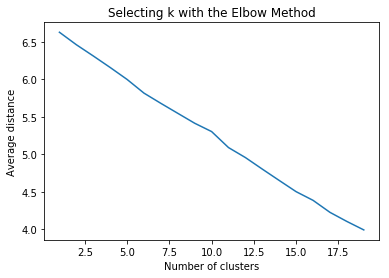

In [77]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')


In [78]:
model3=KMeans(n_clusters=15)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)


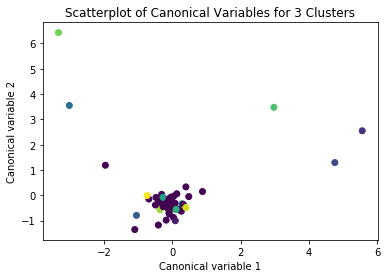

In [79]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()